### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가


In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

## **1. 데이터 불러오기**

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('diabetes.csv')
print(df1.shape, df1.info())  # 모든 변수 수치형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
(768, 9) None


In [3]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1.1. 종속변수(당뇨병 발병 여부) 확인

In [6]:
df1['Outcome'].unique()

array([1, 0])

In [7]:
df1["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df1["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: xlabel='Outcome', ylabel='count'>

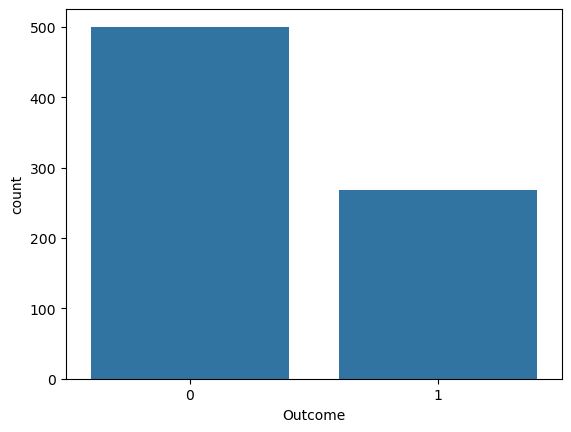

In [9]:
sns.countplot(data=df1, x='Outcome')

* 현재 데이터에 당뇨병이 발병한 행보다 발병하지 않은 행이 더 많다.

## 2. **결측치는 없지만 0이 나올 수 있는 변수와 아닌 변수를 구분해서 EDA 할 것**

In [10]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df1.isnull().sum()  # 결측치 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2.1. 0을 결측치 처리 후 결측치 비율 확인

In [12]:
# Pregnancies, Outcome을 제외한 열들은 0을 결측치로 표시
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
            'DiabetesPedigreeFunction', 'Age']
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [13]:
df1[cols] = df1[cols].replace(0, np.nan)
df_null = df1.isnull()
df_null.sum()   # 0을 결측치 처리 한 후 결측치 갯수

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
df1.describe()  # minimum값이 0이 아님

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,768.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,115.244002,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df_null.mean() * 100   # 각 변수당 결측치 비율

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                      0.000000
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

<Axes: >

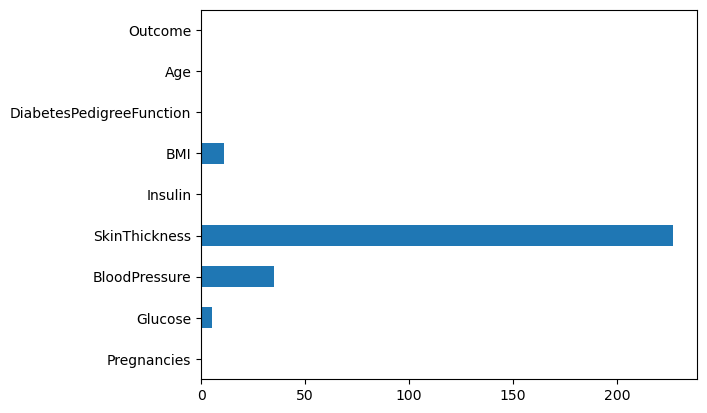

In [16]:
# 변수별 결측치 수
df_null.sum().plot.barh()

In [17]:
df1.head()  # 결측치 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


## **3. 변수별 EDA**

## **3.1. Pregnance**
 - 임신횟수

In [18]:
df1['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='count'>

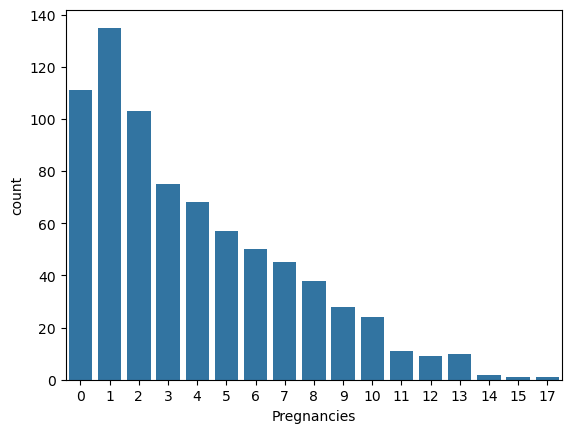

In [19]:
sns.countplot(data=df1, x="Pregnancies")

In [20]:
df1['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

<Axes: >

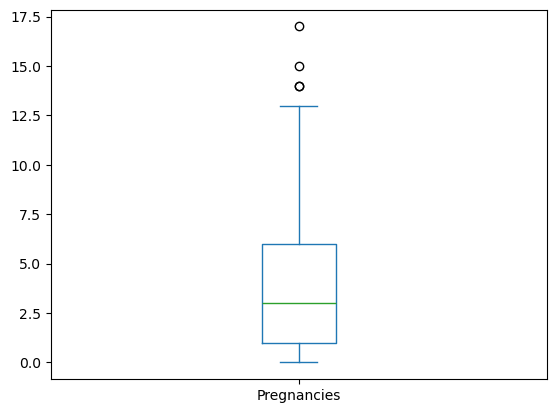

In [21]:
df1['Pregnancies'].plot.box()

In [22]:
# 임신 횟수에 따른 당뇨병 발병 비율
df_pre_out = df1.groupby("Pregnancies")["Outcome"].agg(["count", "mean"]).reset_index()
df_pre_out

,Pregnancies,count,mean
0,0,111,0.342342
1,1,135,0.214815
2,2,103,0.184466
3,3,75,0.360000
4,4,68,0.338235
5,5,57,0.368421
6,6,50,0.320000
7,7,45,0.555556
8,8,38,0.578947
9,9,28,0.642857


<Axes: >

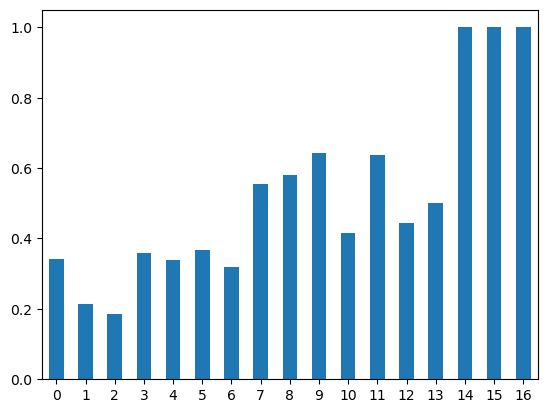

In [23]:
df_pre_out['mean'].plot.bar(rot=0)

<Axes: xlabel='Pregnancies', ylabel='count'>

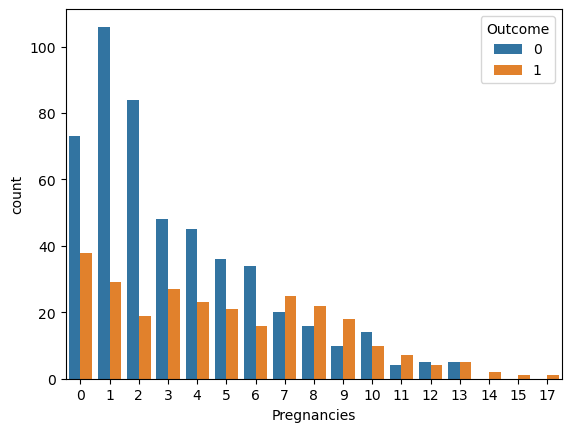

In [24]:
sns.countplot(data=df1, x="Pregnancies", hue="Outcome")

In [25]:
df_0 = df1[df1["Outcome"] == 0]
df_1 = df1[df1["Outcome"] == 1]
df1.shape, df_0.shape, df_1.shape

((768, 9), (500, 9), (268, 9))

/var/folders/r4/cqk5gmns2z3gl1_8c6wsr4qh0000gn/T/ipykernel_37327/2685521112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"])
/var/folders/r4/cqk5gmns2z3gl1_8c6wsr4qh0000gn/T/ipykernel_37327/2685521112.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"]

<Axes: xlabel='Pregnancies', ylabel='Density'>

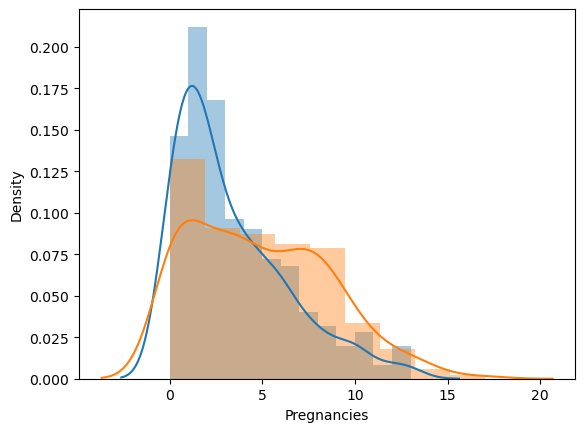

In [26]:
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

### **변수 인사이트 정리**
* 임신 횟수가 늘어날수록 사람 수는 점점 줄어든다. 평균은 3.84, 중위수는 3이며 양의 왜도를 가지고 있는 분포다.
* 당뇨병 발병 여부와 비교해 본 결과 임신횟수가 많아질 수록 당뇨병 발병 비율은 늘어났다. 하지만 임신 횟수가 많아질수록 표본이 부족해 임신횟수의 maximum 근처값인 14,15,16에서는 당뇨병 발병 비율이 1이 나온 것을 확인 할 수 있다. 또한 임신횟수가 약 5보다 큰 경우 당뇨병 발병 확률이 50%가 넘어간다는 것을 알 수 있다.

## **3.2. glucose**
- 혈장 포도당 농도
- 사람 혈당이 0일 수는 없다.
- 당뇨는 혈당이 지속적으로 높은 증상

In [27]:
df1['Glucose'].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

In [28]:
df1['Glucose'].isnull().sum()

np.int64(5)

In [29]:
df1["Glucose"] = df1["Glucose"].fillna(df1["Glucose"].mean())

<Axes: xlabel='Glucose', ylabel='Count'>

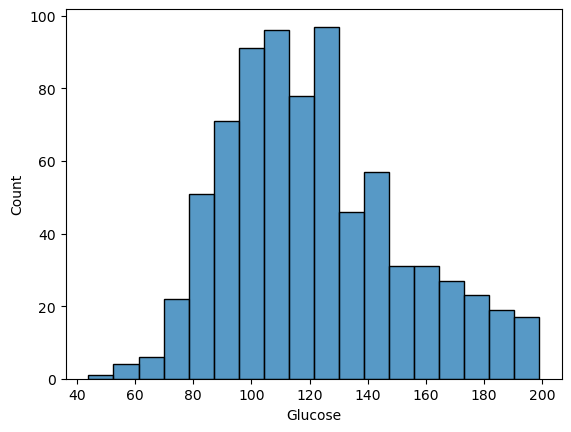

In [30]:
sns.histplot(data=df1, x='Glucose')

<Axes: xlabel='Glucose'>

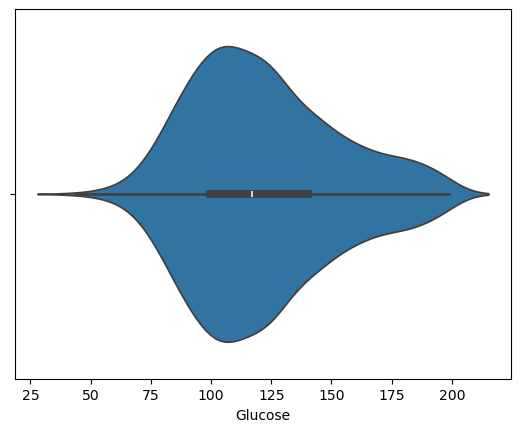

In [31]:
sns.violinplot(data=df1, x='Glucose')

<Axes: xlabel='Outcome', ylabel='Glucose'>

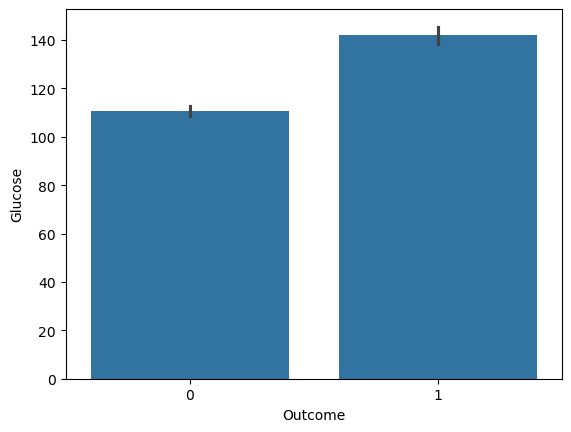

In [32]:
# Glucose와 당뇨병 발병 여부
sns.barplot(data=df1, x="Outcome", y="Glucose")

### **변수 인사이트 정리**
* 글루코스는 양의 실수이며 평균은 121.69, 중위수는 117이며 정규분포에 가까운 형태를 하고 있다. 결측치는 5개가 있으며 이상치 영향이 적다고 판단해 평균으로 대체했다.
* 당뇨병 발병 여부에 따른 바그래프를 그려본 결과 당뇨병 발병 시 글루코스가 더 높게 나타난 것을 확인할 수 있다.

## **3.3. bloodpressure**
- 혈압
- 혈압도 0일 수는 없다 

In [33]:
df1['BloodPressure'].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [34]:
df1['BloodPressure'].isnull().sum()

np.int64(35)

<Axes: >

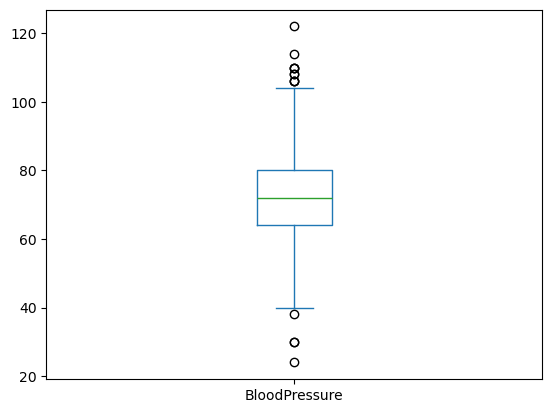

In [35]:
df1['BloodPressure'].plot.box()

<Axes: ylabel='BloodPressure'>

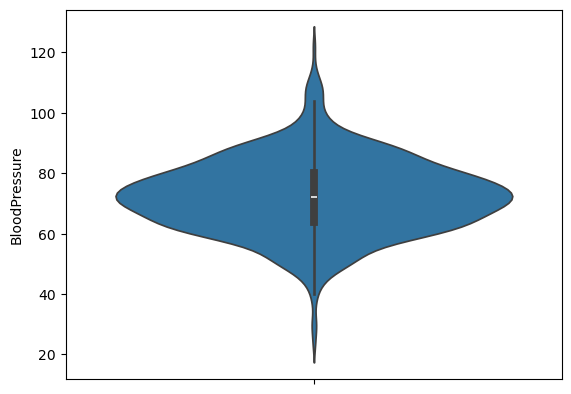

In [36]:
sns.violinplot(data=df1, y='BloodPressure')

In [37]:
df1["BloodPressure"] = df1["BloodPressure"].fillna(df1["BloodPressure"].mean())

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

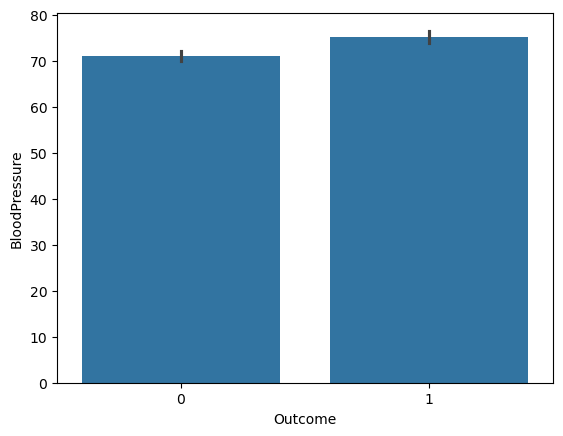

In [38]:
# BloodPressure와 당뇨병 발병 여부
sns.barplot(data=df1, x="Outcome", y="BloodPressure")

### **변수 인사이트 정리**
* 혈압의 평균은 72.4, 중위수는 72로 정규분포에 가까운 형태를 띄고 있다. 따라서 결측치 35개를 평균으로 대체했다.
* 당뇨병 발병 여부에 따른 바그래프를 그려본 결과 당뇨병 발병 시 글루코스가 미세하게 더 높게 나타난 것을 확인할 수 있다.

## **3.4. SkinThickness**
- 삼두근 피부 두께
- 체지방이란 관련이 있다.
- 0일 수 없다

In [39]:
df1['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [40]:
df1['SkinThickness'].isnull().sum()

np.int64(227)

<Axes: xlabel='SkinThickness', ylabel='Count'>

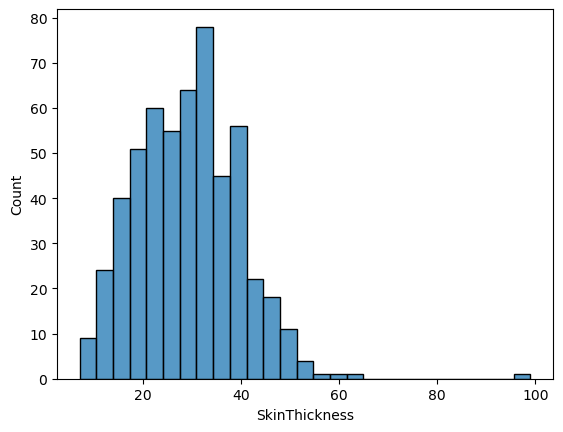

In [41]:
sns.histplot(data=df1, x='SkinThickness')

<Axes: xlabel='SkinThickness'>

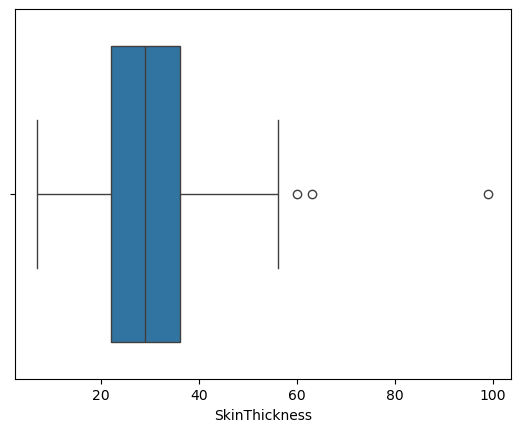

In [42]:
sns.boxplot(data=df1, x='SkinThickness')

In [43]:
df1["SkinThickness"] = df1["SkinThickness"].fillna(df1["SkinThickness"].median())

In [44]:
df1['SkinThickness'].isnull().sum()

np.int64(0)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

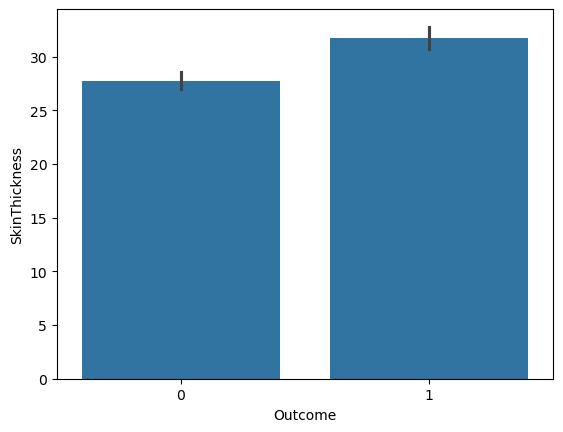

In [45]:
sns.barplot(data=df1, x="Outcome", y="SkinThickness")

<Axes: xlabel='SkinThickness', ylabel='Count'>

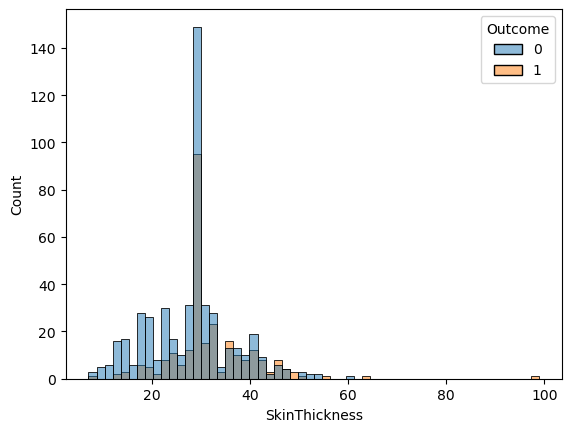

In [46]:
sns.histplot(data=df1, x='SkinThickness', hue='Outcome')

### **변수 인사이트 정리**
* 피부 두께의 평균은 29.15, 중위수는 29이며 100근처에 이상치가 하나 있는 것을 볼 수 있다. 227개의 결측치가 있으며 하나의 뚜렷한 이상치가 있으므로 중위수로 결측치를 대체했다.
* 당뇨병이 발병한 사람들의 피부 두께가 더 두껍고 반대로 피부 두께가 30이상인 데이터에서만 당뇨병이 발병했다.

## **3.5. Insulin**
- 인슐린 분비량
- 당뇨병 유형은 인슐린이 선천적으로 나오지 않는 사람(1형)과 인슐린이 나오지만 인식을 못하는 사람(2형) 당뇨병 두가지가 있다.  

In [47]:
df1['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

<Axes: xlabel='Insulin', ylabel='Count'>

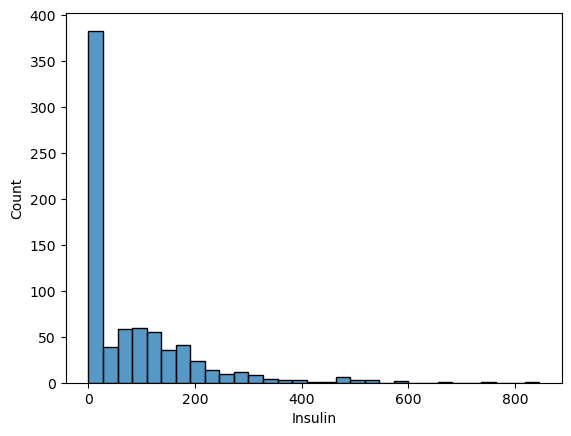

In [48]:
sns.histplot(data=df1, x='Insulin')

### 인슐린이 0인 행 처리

In [49]:
(df1['Insulin'] == 0).sum()

np.int64(374)

In [50]:
# 경우 1) 인슐린이 0이면서 BMI 또는 피부두께 또는 글루코스가 0인 경우  =>  미측정이므로 결측 처리
cols = ["BMI", "BloodPressure", "SkinThickness", "Glucose"]
mask1 = ( (df1["Insulin"] == 0) & ( df1[cols].isna().any(axis=1) ) )
count = mask1.sum()

count   # 234개

np.int64(10)

In [51]:
df1.loc[mask1, 'Insulin'] = np.nan

In [52]:
(df1['Insulin'] == 0).sum()

np.int64(364)

In [53]:
# 경우 2.1) 인슐린이 0이면서 Glucose(혈장 포도당 농도)가 Q3초과 : 1형 당뇨 => 파생변수 생성
# 경우 2.2) 인슐린이 0이면서 Glucose(혈장 포도당 농도)가 Q3이하 : 2형 당뇨 => 파생변수 생성
q1 = df1['Glucose'].quantile(0.25)
q3 = df1['Glucose'].quantile(0.75)
print(q1, q3)  # 99, 141
mask2 = ((df1['Insulin'] == 0) & (df1['Glucose'] > q3))
mask3 = ((df1['Insulin'] == 0) & (df1['Glucose'] <= q3))
print(mask2.sum())  # 29개
print(mask3.sum())  # 111개

99.75 140.25
87
277


In [54]:
df1["Insulin_type1"] = mask2.astype(int)
df1["Insulin_type2"] = mask3.astype(int)

In [55]:
df1[['Insulin','Insulin_type1', 'Insulin_type2']].head()

,Insulin,Insulin_type1,Insulin_type2
0,0.0,1,0
1,0.0,0,1
2,0.0,1,0
3,94.0,0,0
4,168.0,0,0


### 인슐린 변수 EDA

In [56]:
Insulin_non0 = df1.loc[df1['Insulin'] > 0, 'Insulin']
Insulin_non0.describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

<Axes: >

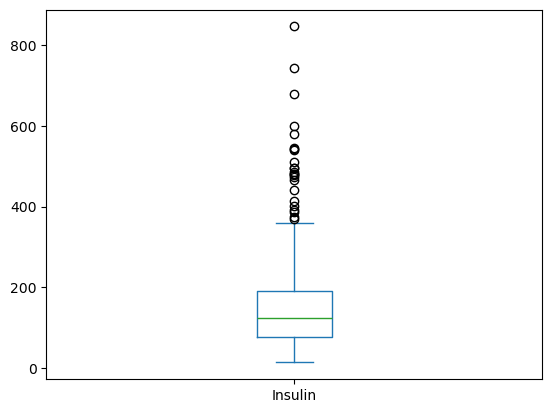

In [57]:
Insulin_non0.plot.box()

<Axes: xlabel='Insulin', ylabel='Count'>

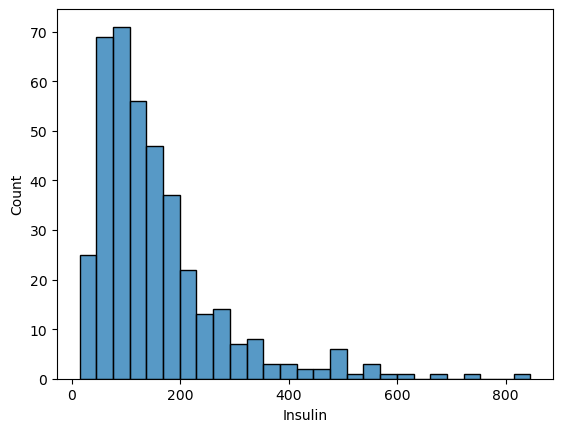

In [58]:
sns.histplot(data=df1.loc[df1['Insulin'] > 0], x="Insulin")

In [59]:
df1['Insulin'].isnull().sum()

np.int64(10)

In [60]:
df1["Insulin"] = df1["Insulin"].fillna(df1.loc[df1['Insulin'] > 0, 'Insulin'].median())

In [61]:
df1['Insulin'].isnull().sum()

np.int64(0)

<Axes: xlabel='Outcome', ylabel='Insulin'>

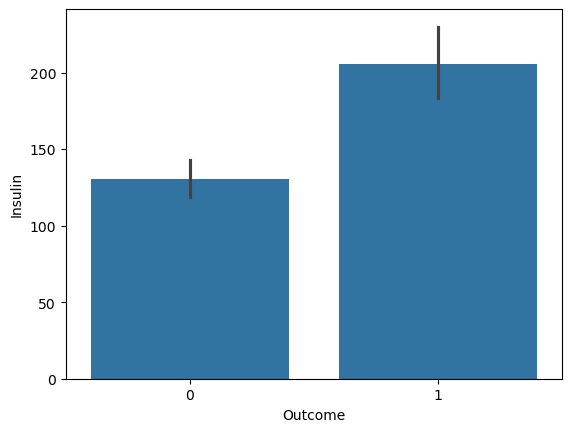

In [62]:
# 인슐린과 당뇨병 발병 여부
sns.barplot(data=df1.loc[df1['Insulin'] > 0], x="Outcome", y="Insulin")

### **변수 인사이트 정리**
* 인슐린 분비량이 0인 행이 374개가 있었다. 미측정된 행일 가능성이 높으므로 다른 변수들 중 NaN값이 있는 지 확인한 결과 234개의 행이 있었고 이 행의 인슐린 값을 NaN으로 표시했다. 또한 인슐린 분비량이 0이면서 글루코스가 Q3 초과인 행에 논리형 파생변수 Insulin_type1을 만들었고 인슐린 분비량이 0이면서 글루코스가 Q3 이하인 행에 논리형 파생변수 Insulin_type2를 만들었다. Insulin_type1와 Insulin_type2는 각각 1형 당뇨와 2형 당뇨를 의미하며 29개, 111개 행이 있다.
* 0을 제외한 인슐린 변수에서 평균은 155.55, 중위값은 125이다. 오른쪽 꼬리를 달고 있는 Right-Skewed 된 분포를 띈다.
* 또한 당뇨병 결과와 0을 제외한 인슐린을 바그래프로 그린 결과 당뇨병이 발병했을 때 인슐린 수치가 훨씬 높은 것을 알 수 있다.

## **3.6. BMI**
- 0이 나올 수 없는 값

In [63]:
df1['BMI'].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [64]:
df1['BMI'].isnull().sum()

np.int64(11)

In [65]:
df1["BMI"] = df1["BMI"].fillna(df1["BMI"].median())

In [66]:
df1['BMI'].isnull().sum()

np.int64(0)

<Axes: ylabel='BMI'>

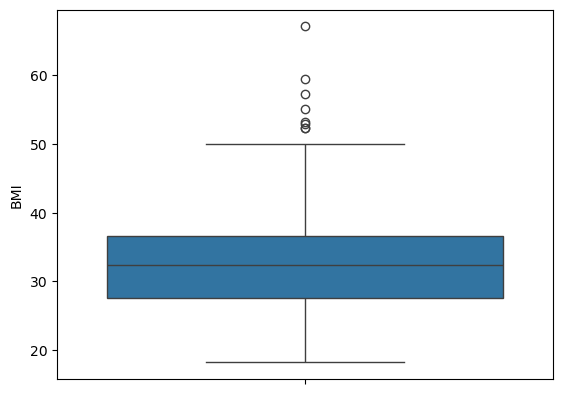

In [67]:
sns.boxplot(data=df1, y='BMI')

<Axes: xlabel='BMI', ylabel='Count'>

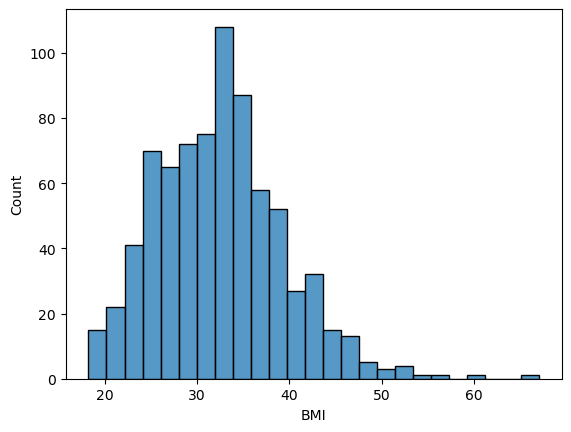

In [68]:
sns.histplot(data=df1, x='BMI')

<Axes: xlabel='Outcome', ylabel='BMI'>

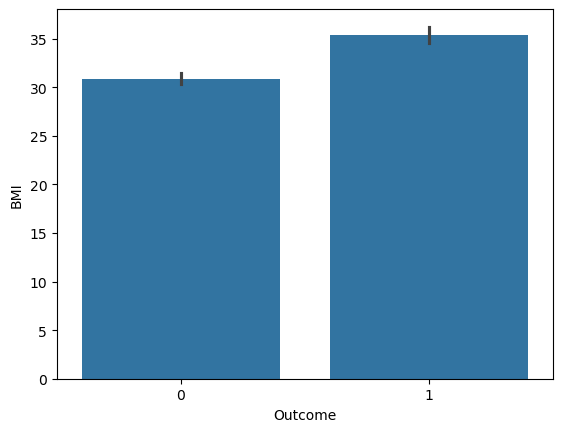

In [69]:
# BMI와 당뇨병 발병 여부
sns.barplot(data=df1, x="Outcome", y="BMI")

In [70]:
df1[['BMI','Outcome']].corr()

,BMI,Outcome
BMI,1.000000,0.312038
Outcome,0.312038,1.000000


### **변수 인사이트 정리**
* BMI 변수의 결측치는 11개이며 평균은 32.46, 중위수는 32.3이다. 대칭인 분포처럼 보이지만 값이 높은 방향에 이상치가 존재하는 것을 알 수 있다. 따라서 결측치 11개를 중위수로 대체했다.
* 당뇨병이 발생하는 경우의 BMI가 더 높은 것을 알 수 있다. 이를 상관계수로 확인했을 때 0.312로 약한 양의 상관관계에 있음을 알 수 있다.

## **3.7. Subplot**

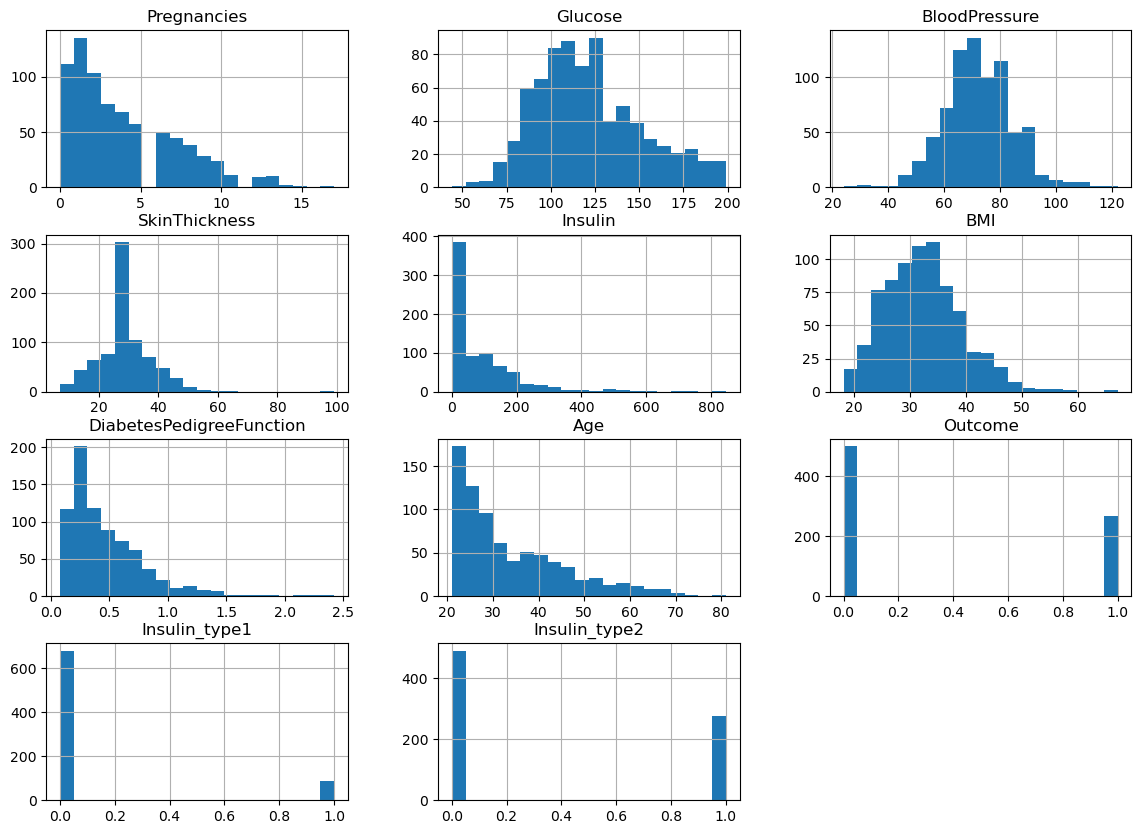

In [71]:
h = df1.hist(figsize=(14,10), bins=20)

In [72]:
cols = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 1 0
3 SkinThickness 1 1
4 Insulin 2 0
5 BMI 2 1
6 DiabetesPedigreeFunction 3 0
7 Age 3 1


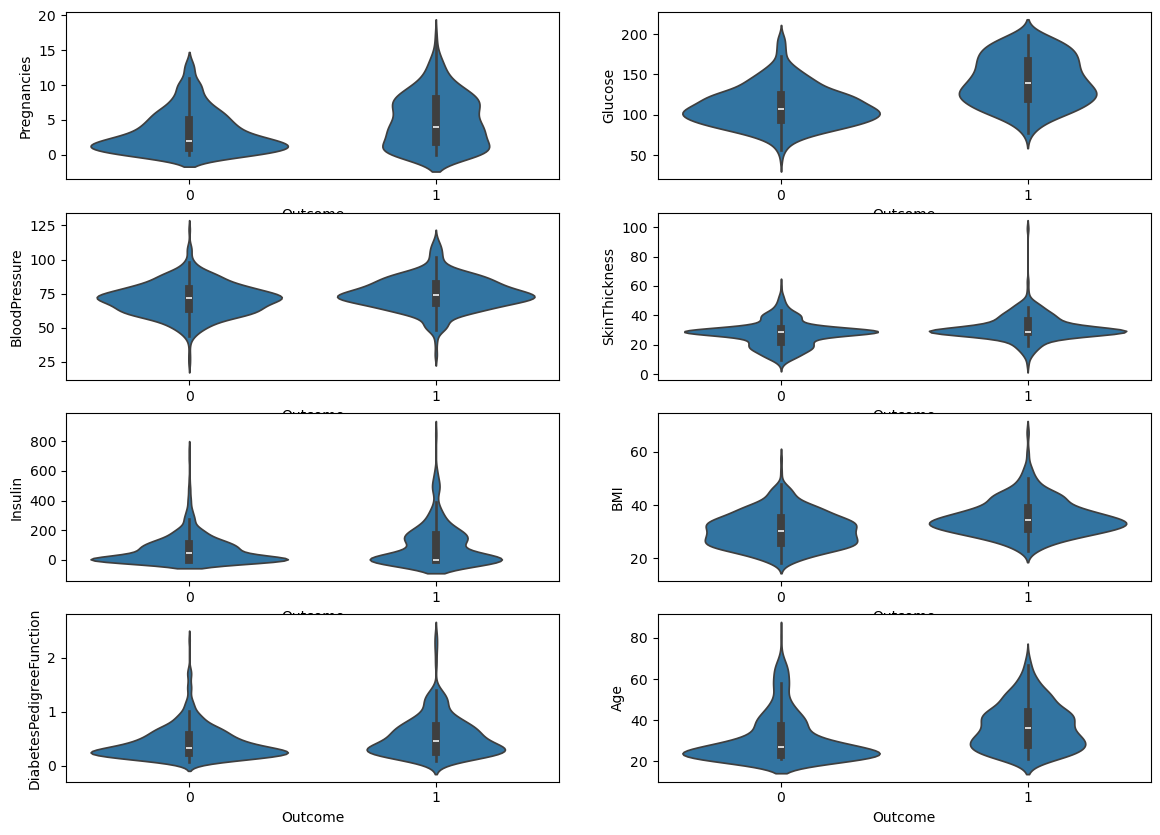

In [73]:
# 당뇨병 발병 여부에 따른 각 변수의 violin plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,10))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    print(i, col_name, row, col)
    sns.violinplot(data=df1, x="Outcome", y=col_name , ax=axes[row][col])

## **3.8. 상관 분석**

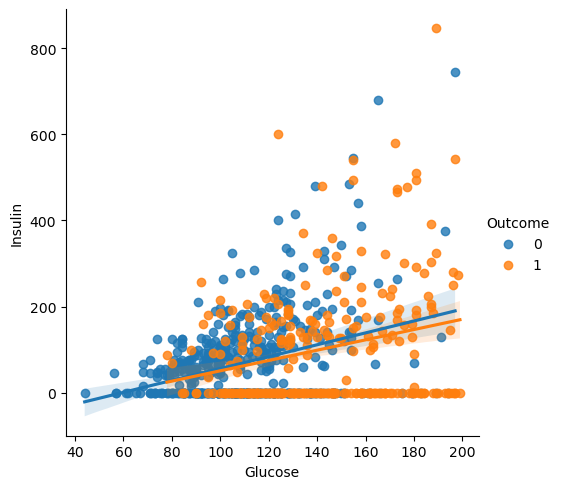

In [74]:
# 글루코스와 인슐린의 상관성
sns.lmplot(data=df1, x="Glucose", y="Insulin", hue="Outcome")

In [75]:
df_matrix = df1.iloc[:,:-2]
df_matrix
# plt.figure(figsize=(14,8))
# sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,0.0,30.1,0.349,47,1


<Axes: >

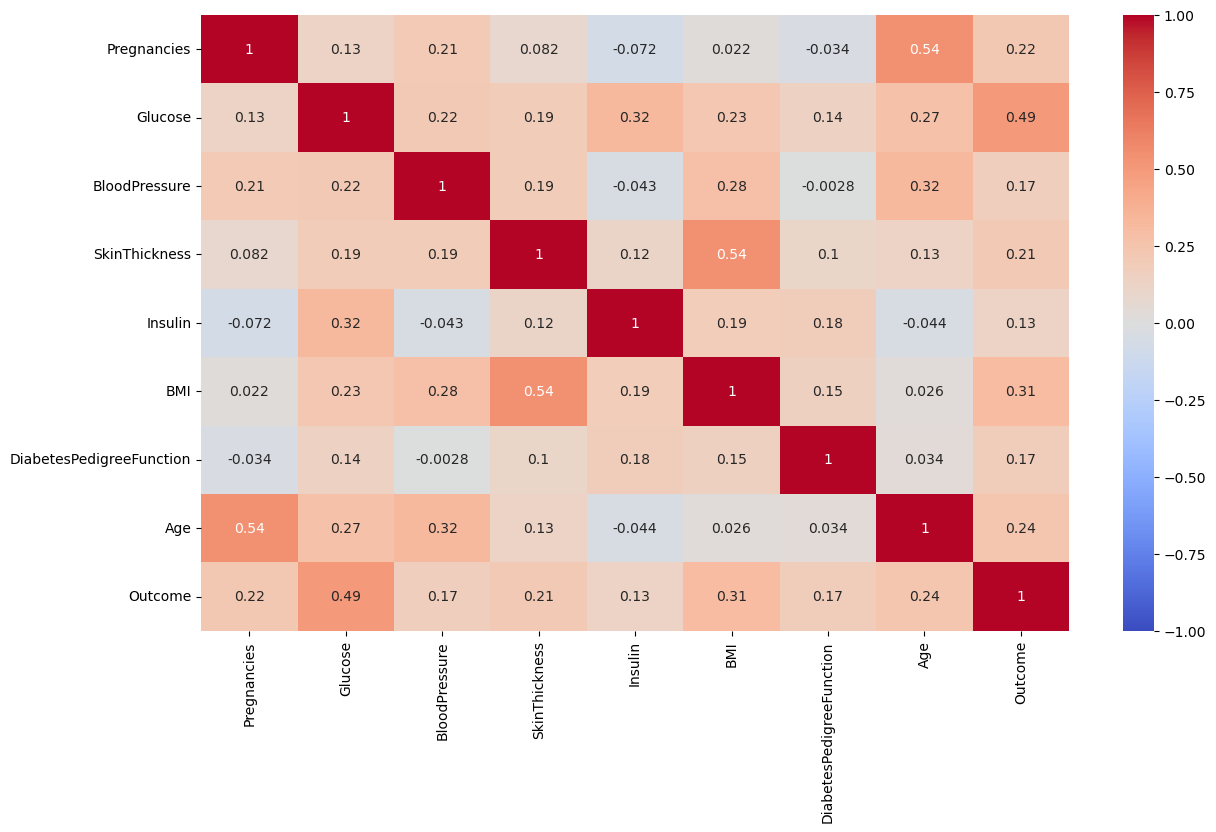

In [76]:
plt.figure(figsize=(14,8))
sns.heatmap(df_matrix.corr(), annot=True, vmax=1, vmin=-1, cmap='coolwarm')

## **4. 파생변수 생성 및 추가 전처리**

### **4.1. 임신횟수가 6이상인 행에 대해 Pregnancies_high 라는 범주형 파생변수 생성**

<Axes: xlabel='Pregnancies', ylabel='Count'>

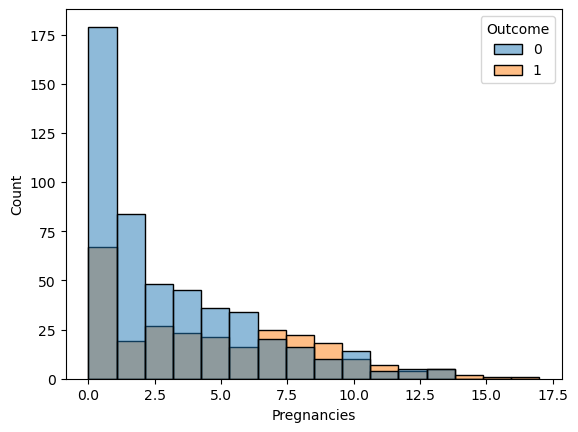

In [77]:
sns.histplot(data=df1, x='Pregnancies', hue='Outcome')

In [78]:
df1["Pregnancies_high"] = df1["Pregnancies"] > 6
df1["Pregnancies_high"] = df1["Pregnancies_high"].astype(int)
df1[["Pregnancies", "Pregnancies_high"]].head(10)

,Pregnancies,Pregnancies_high
0,6,0
1,1,0
2,8,1
3,1,0
4,0,0
5,5,0
6,3,0
7,10,1
8,2,0
9,8,1


<Axes: xlabel='Pregnancies_high', ylabel='count'>

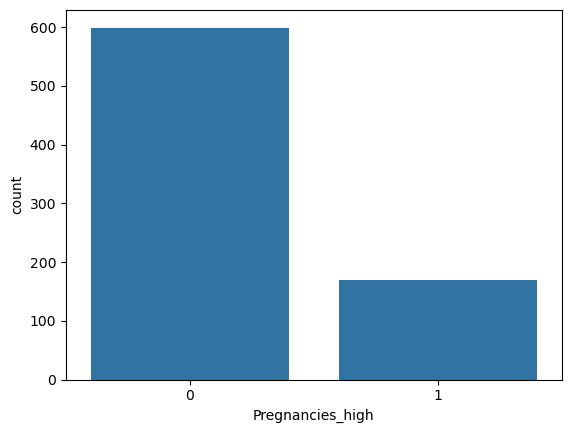

In [79]:
sns.countplot(data=df1, x='Pregnancies_high')

<Axes: xlabel='Pregnancies_high', ylabel='count'>

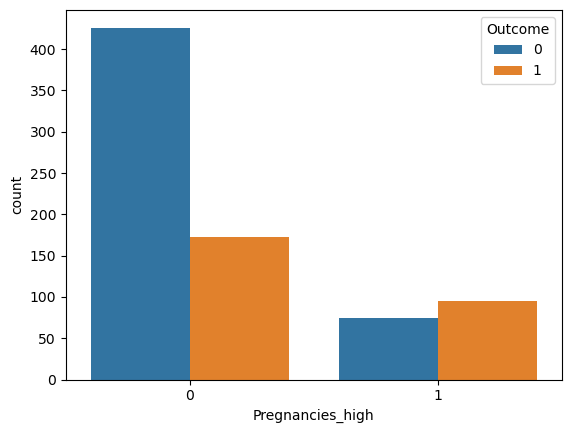

In [80]:
sns.countplot(data=df1, x='Pregnancies_high', hue='Outcome')

* 히스토그램을 봤을 때 임신횟수가 대략 6회 이상일 때 당뇨가 발생했다. 따라서 임신횟수가 6이상인 데이터와 아닌 데이터를 범주화하여 파생변수를 만들었다. 이 변수에 따른 당뇨병 발병 비율을 확인한 결과, 임신횟수가 많을수록 당뇨병 발병 비율이 높은 것을 알 수 있다.

### **4.2. 나이를 세가지 범주로 나눠 파생변수 생성**

<Axes: xlabel='Age', ylabel='Count'>

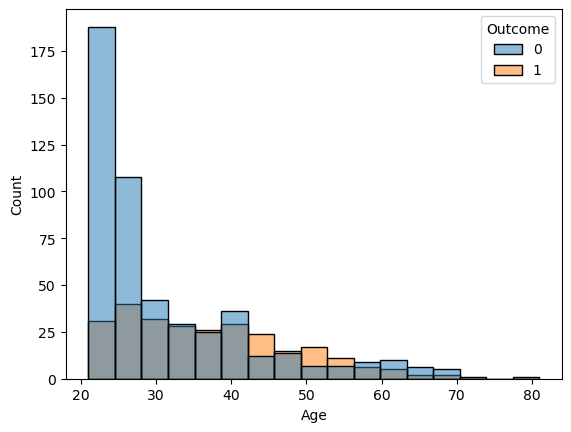

In [81]:
sns.histplot(data=df1, x='Age', hue='Outcome')

In [82]:
df1["Age_low"] = (df1["Age"] < 30).astype(int)
df1["Age_middle"] = ((df1["Age"] >= 30) & (df1["Age"] <= 60) ).astype(int)
df1["Age_high"] = (df1["Age"] > 60 ).astype(int)
df1[["Age", "Age_low", "Age_middle", "Age_high"]]

,Age,Age_low,Age_middle,Age_high
0,50,0,1,0
1,31,0,1,0
2,32,0,1,0
3,21,1,0,0
4,33,0,1,0
...,...,...,...,...
763,63,0,0,1
764,27,1,0,0
765,30,0,1,0
766,47,0,1,0


<Axes: xlabel='Age_middle', ylabel='count'>

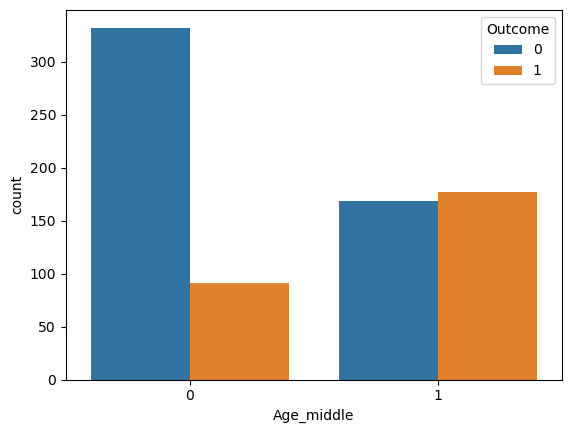

In [83]:
# sns.countplot(data=df1, x="Age_low", hue="Outcome")
sns.countplot(data=df1, x="Age_middle", hue="Outcome")
# sns.countplot(data=df1, x="Age_high", hue="Outcome")

* 당뇨병의 발병 나이가 30~60세에서 나타났으므로 30세, 60세를 기준으로 범주형 파생변수 세 가지를 만든다.
* 나이가 어린 범주에서는 당뇨 발병 비율이 낮았고 나이가 많은 범주는 표본이 부족했다. 중간 나이인 범주에서는 그 외 범주와 표본 크기는 비슷했으나 당뇨 발병 빈도가 많이 당뇨 발병 비율이 높다.

### **4.3. 인슐린 변수가 Right-Skewed 되어있기 때문에 로그변환을 통해 새로운 변수 생성**

<Axes: xlabel='Insulin', ylabel='Count'>

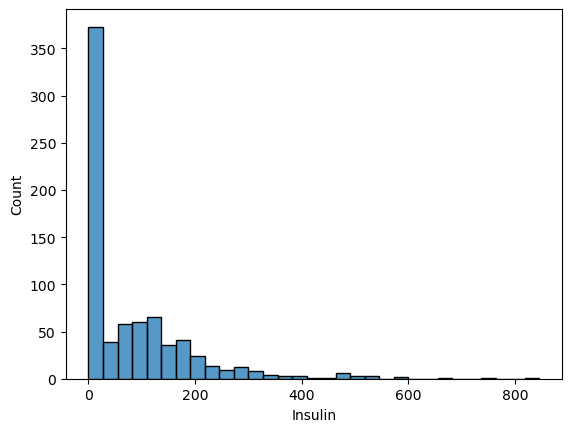

In [84]:
sns.histplot(data=df1, x='Insulin')

In [85]:
df1['Insulin_log'] = np.log(df1['Insulin'] + 1)
df1['Insulin_log']

0      0.000000
1      0.000000
2      0.000000
3      4.553877
4      5.129899
         ...   
763    5.198497
764    0.000000
765    4.727388
766    0.000000
767    0.000000
Name: Insulin_log, Length: 768, dtype: float64

<Axes: xlabel='Insulin_log', ylabel='Count'>

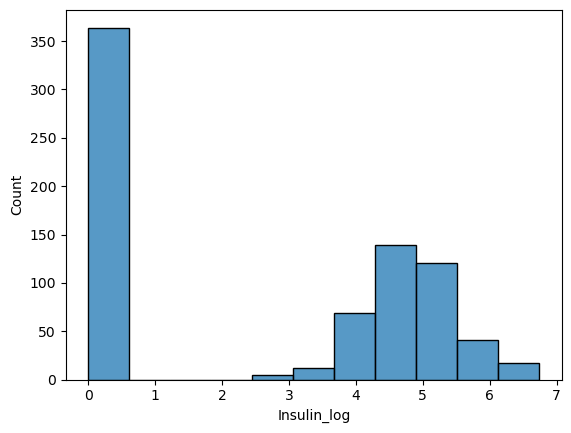

In [86]:
sns.histplot(data=df1, x='Insulin_log')

# **모델링하기**

In [87]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Insulin_type1',
       'Insulin_type2', 'Pregnancies_high', 'Age_low', 'Age_middle',
       'Age_high', 'Insulin_log'],
      dtype='object')

In [88]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기

X = df1[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
         'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_log']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [89]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.2, random_state=1234)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [91]:
X.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies_high            0
Insulin_log                 0
dtype: int64

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

# **각자 공부한 모델 쓰기** : GLM???

In [92]:
# 4) 학습 수행
from sklearn.linear_model import LogisticRegression

In [93]:
model = LogisticRegression(C=0.7, max_iter=2000, random_state=1234, class_weight="balanced")
model.fit(X_train, Y_train) # 학습 수행

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.7
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",1234
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [94]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [95]:
Y_train_pred = model.predict(X_train)

In [96]:
Y_test_pred = model.predict(X_test)

In [97]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  0.757328990228013
검증 정확도 :  0.7467532467532467


### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [98]:
# 4) 학습 수행
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
from sklearn.preprocessing import StandardScaler #Standard Scaling

In [99]:
# 파이프라인 구조 설계
# 스케일링 하고 싶으면 StandardScaler() 사용

model_pipe = make_pipeline(SimpleImputer(strategy="median"),
                          StandardScaler(),
                          LogisticRegression(max_iter=2000, random_state=1234))

model_pipe.fit(X_train, Y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('simpleimputer', ...), ('standardscaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite

#### **공부한 모델의 하이퍼파라미터**

- 1. C(규제 강도의 역수) : 값을 키우면 규제가 약해져 모델이 복잡해져서 과적합이 발생할 수 있다. 반대로 값을 줄이면 규제가 강해져 과적합이 줄 수 있지만 과소적합이 생길 수 있다.
- 2. penalty(규제 종류)
     - l2(기본, 안정적) : 가중치를 전체적으로 작게 만들어 안정적이고 과적합을 완화하는 경향이 있다.
     - l1(변수 선택 효과) : 일부 가중치를 0으로 만들어 변수 선택 효과가 생기며, 너무 강하면 과소적합이 날 수 있다.
     - elasticent : l1+l2
- 3. solver(최적화 방법) : 학습이 잘 수렴하는지 혹은 수렴 속도에 영향을 준다. penalty에 따라 쓸 수 있는 solver 조합이 제한되며, 잘못 고르면 수렴 실패나 성능 저하가 생길 수 있다.
- 4. class_weight : 불균형 데이터에서 minority 클래스를 더 중요하게 학습하돌록 만든다. 값을 조정하면 재현율(recall)은 올라갈 수 있지만 정확도(accuracy)는 떨어질 수 있다.
- 5. max_iter(반복 횟수) : 값을 너무 작게 두면 수렴을 못 해서 성능이 낮아질 수 있다. 값을 키우면 보통 수렴이 안정된다.

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam = {
    "logisticregression__C": [0.01, 0.1, 1, 10, 100],
    "logisticregression__penalty": ["l2"],
    "logisticregression__solver": ["lbfgs"]
}

grid_model1 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='f1', n_jobs=-1)
grid_model1.fit(X_train, Y_train)
best_model1 = grid_model1.best_estimator_

/opt/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid thi

In [102]:
best_model1

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('simpleimputer', ...), ('standardscaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite

In [103]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [104]:
from sklearn.metrics import classification_report

In [105]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       401
           1       0.74      0.57      0.65       213

    accuracy                           0.78       614
   macro avg       0.77      0.73      0.74       614
weighted avg       0.78      0.78      0.77       614



In [106]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



# **성능을 높이기 위한 방안**

1. test 데이터의 정확도가 test 데이터의 정확도보다 많이 낮으면 과적합
2. 하이퍼파라미터 튜닝, 추가적인 전처리(변수 제거) 혹은 파생변수 생성 으로 이를 해결 할 수 있다.  